<a href="https://colab.research.google.com/github/MichalWilk45/MichalWilk45/blob/main/DS_2_Codebrainers_ML_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Zaimportuj biblioteki:


from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
data = load_iris()

In [ ]:
print(data)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
data = load_iris()
X = data.data
y = data.target

In [ ]:
model = LogisticRegression()

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
kf

KFold(n_splits=5, random_state=42, shuffle=True)

In [ ]:
# Zakładamy, że 20% danych zostanie wykorzystane jako zbiór testowy
test_size = 0.2
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [ ]:
scores = []
for train_index, test_index in kf.split(X_train):
    X_train_kf, X_test_kf = X_train[train_index], X_train[test_index]
    y_train_kf, y_test_kf = y_train[train_index], y_train[test_index]
    model.fit(X_train_kf, y_train_kf)
    scores.append(model.score(X_test_kf, y_test_kf))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
scores

[0.9583333333333334, 1.0, 0.9166666666666666, 0.875, 1.0]

In [ ]:
mean_scores = sum(scores)/len(scores)
mean_scores

0.95

In [ ]:
best_model = model
best_model.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1]}

svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X, y)

print("Najlepszy wynik: {:.2f}".format(grid_search.best_score_))
print("Najlepsze parametry: ", grid_search.best_params_)

Najlepszy wynik: 0.98
Najlepsze parametry:  {'C': 1, 'gamma': 0.1}


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris
from scipy.stats import uniform

iris = load_iris()
X = iris.data
y = iris.target

param_distributions = {'C': uniform(0, 100),
                       'gamma': uniform(0, 1)}

svc = SVC()
random_search = RandomizedSearchCV(svc, param_distributions, cv=5, n_iter=10, random_state=0)
random_search.fit(X, y)

print("Najlepszy wynik: {:.2f}".format(random_search.best_score_))
print("Najlepsze parametry: ", random_search.best_params_)

Najlepszy wynik: 0.98
Najlepsze parametry:  {'C': 7.103605819788694, 'gamma': 0.08712929970154071}


In [ ]:
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

iris = load_iris()
X = iris.data
y = iris.target

def svm_cv(C, gamma):
    svc = SVC(C=C, gamma=gamma, random_state=0)
    score = cross_val_score(svc, X, y, cv=5).mean()
    return score

pbounds = {'C': (0.1, 100),
           'gamma': (0.001, 1)}

In [ ]:
optimizer = BayesianOptimization(f=svm_cv, pbounds=pbounds, random_state=0)
optimizer.maximize(init_points=5, n_iter=25)

print("Najlepszy wynik: {:.2f}".format(optimizer.max['target']))
print("Najlepsze parametry: ", optimizer.max['params'])

|   iter    |  target   |     C     |   gamma   |
-------------------------------------------------
| 1         | 0.9533    | 54.93     | 0.7155    |
| 2         | 0.9533    | 60.32     | 0.5453    |
| 3         | 0.9533    | 42.42     | 0.6462    |
| 4         | 0.9533    | 43.81     | 0.8919    |
| 5         | 0.96      | 96.37     | 0.3841    |
| 6         | 0.94      | 100.0     | 1.0       |
| 7         | 0.96      | 95.08     | 0.3033    |
| 8         | 0.94      | 92.05     | 1.0       |
| 9         | 0.9533    | 51.32     | 0.8739    |
| 10        | 0.96      | 47.76     | 0.2491    |
| 11        | 0.9867    | 46.25     | 0.006483  |
| 12        | 0.9533    | 45.87     | 0.5642    |
| 13        | 0.9533    | 8.251     | 0.8145    |
| 14        | 0.9533    | 51.66     | 0.9502    |
| 15        | 0.96      | 83.08     | 0.169     |
| 16        | 0.9733    | 46.12     | 0.1017    |
| 17        | 0.98      | 46.22     | 0.03205   |
| 18        | 0.9467    | 95.22     | 0.8435    |


In [ ]:
optimizer = BayesianOptimization(f=svm_cv, pbounds=pbounds, random_state=0)
optimizer.maximize(init_points=5, n_iter=25)

print("Najlepszy wynik: {:.2f}".format(optimizer.max['target']))
print("Najlepsze parametry: ", optimizer.max['params'])

|   iter    |  target   |     C     |   gamma   |
-------------------------------------------------
| 1         | 0.9533    | 54.93     | 0.7155    |
| 2         | 0.9533    | 60.32     | 0.5453    |
| 3         | 0.9533    | 42.42     | 0.6462    |
| 4         | 0.9533    | 43.81     | 0.8919    |
| 5         | 0.96      | 96.37     | 0.3841    |
| 6         | 0.94      | 100.0     | 1.0       |
| 7         | 0.96      | 95.08     | 0.3033    |
| 8         | 0.94      | 92.05     | 1.0       |
| 9         | 0.9533    | 51.32     | 0.8739    |
| 10        | 0.96      | 47.76     | 0.2491    |
| 11        | 0.9867    | 46.25     | 0.006483  |
| 12        | 0.9533    | 45.87     | 0.5642    |
| 13        | 0.9533    | 8.251     | 0.8145    |
| 14        | 0.9533    | 51.66     | 0.9502    |
| 15        | 0.96      | 83.08     | 0.169     |
| 16        | 0.9733    | 46.12     | 0.1017    |
| 17        | 0.98      | 46.22     | 0.03205   |
| 18        | 0.9467    | 95.22     | 0.8435    |


In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# wczytanie zbioru danych Iris
iris = load_iris()

# definicja modelu KNN
model = KNeighborsClassifier()

# definicja zakresu wartości hiperparametrów
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# definicja walidacji krzyżowej
cv = StratifiedKFold(n_splits=5)

# połączenie optymalizacji hiperparametrów z walidacją krzyżową
grid_search = GridSearchCV(
    model, param_grid=param_grid, cv=cv, n_jobs=-1
)

# przeprowadzenie optymalizacji hiperparametrów
grid_search.fit(iris.data, iris.target)

# wybór najlepszego modelu
best_model = grid_search.best_estimator_

# wyniki optymalizacji hiperparametrów
print("Najlepsze parametry modelu:", grid_search.best_params_)
print("Najlepsza dokładność:", grid_search.best_score_)

Najlepsze parametry modelu: {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
Najlepsza dokładność: 0.9800000000000001


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [33]:
from google.colab import drive
drive.mount('/gdrive')

data = pd.read_csv("/gdrive/My Drive/mobile_phones.csv", thousands=',')
data["price_range"]=data["price_range"].astype("category")
# Opisanie cech i struktury danych
print(data.info())

Mounted at /gdrive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   battery_power  2000 non-null   int64   
 1   blue           2000 non-null   int64   
 2   clock_speed    2000 non-null   float64 
 3   dual_sim       2000 non-null   int64   
 4   fc             2000 non-null   int64   
 5   four_g         2000 non-null   int64   
 6   int_memory     2000 non-null   int64   
 7   m_dep          2000 non-null   float64 
 8   mobile_wt      2000 non-null   int64   
 9   n_cores        2000 non-null   int64   
 10  pc             2000 non-null   int64   
 11  px_height      2000 non-null   int64   
 12  px_width       2000 non-null   int64   
 13  ram            2000 non-null   int64   
 14  sc_h           2000 non-null   int64   
 15  sc_w           2000 non-null   int64   
 16  talk_time      2000 non-null   int64   
 17  three_g       

In [34]:
# Analiza statystyczna danych
print(data.describe())

       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.521500    32.046500     0.501750   140.249000     4.520500   
std       0.499662    18.145715     0.288416    35.399655     2.287837   
min       0.000000     2.000000     0

<Axes: >

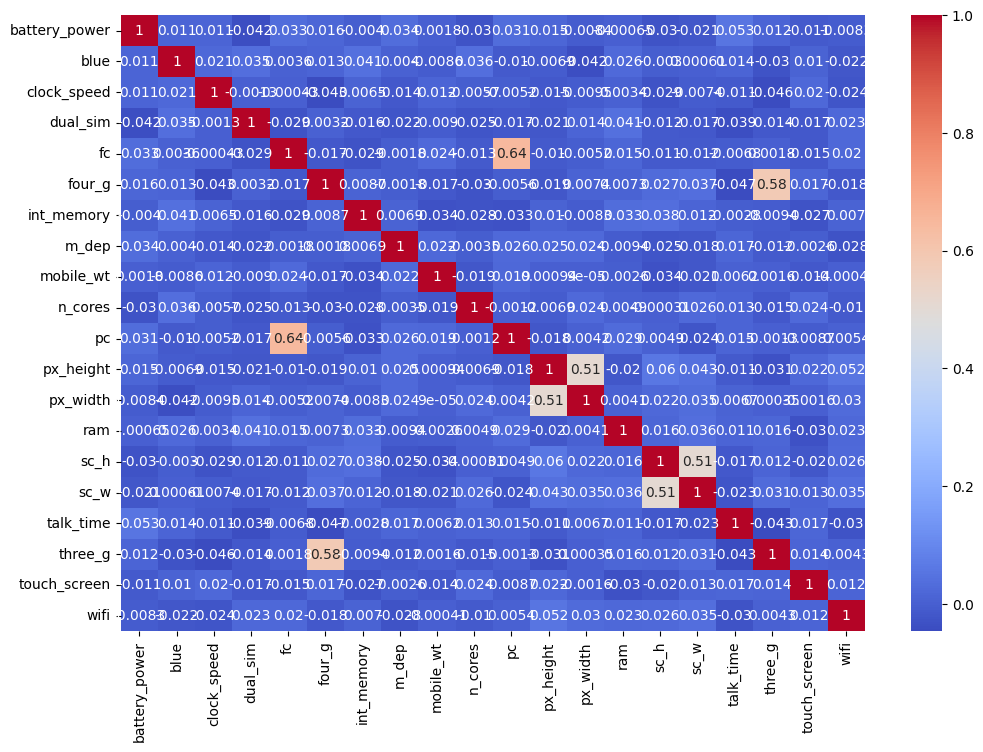

In [35]:
# Wizualizacja danych
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [36]:
# 2. Przygotowanie danych:
# Usunięcie brakujących danych
data = data.dropna()

In [37]:
# Standaryzacja i normalizacja danych
scaler = StandardScaler()
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [38]:
# 3. Podział danych:
# Podział danych na zbiór treningowy i testowy
X = data.drop([ 'price_range'], axis=1)
y = data['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# 4. Budowanie modelu:
# Wybór algorytmu uczenia maszynowego
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

In [40]:
# Trenowanie modelu, ewaluacja i cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Model: {name} - Cross-validation scores: {scores}")

Model: Logistic Regression - Cross-validation scores: [0.95     0.95     0.946875 0.934375 0.96875 ]
Model: Random Forest - Cross-validation scores: [0.865625 0.90625  0.865625 0.85625  0.840625]
Model: SVM - Cross-validation scores: [0.853125 0.89375  0.878125 0.846875 0.85    ]


In [41]:
#optymalizacja hiperparametrow

# 5. Ocena modelu:
# Wybór najlepszego modelu
best_model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [42]:
# Ocena jakości modelu na zbiorze testowym
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8925
[[101   4   0   0]
 [  7  77   7   0]
 [  0   7  79   6]
 [  0   0  12 100]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.88      0.85      0.86        91
           2       0.81      0.86      0.83        92
           3       0.94      0.89      0.92       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400

